In [1]:
!pip install -U transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.8/558.8 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.33.4
    Uninstalling huggingface-hub-0.33.4:
      Successfully uninstalled huggingface-hub-0.33.4
  Attempting uninstall: transformers
    Found existing installation: transformers 4.53.3
    Uninstalling transformers-4.53.3:
      Successfully uninstalled transformers-4.53.3


## Local Inference on GPU
Model page: https://huggingface.co/Qwen/Qwen2.5-VL-32B-Instruct

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/Qwen/Qwen2.5-VL-32B-Instruct)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [2]:
from transformers import pipeline
from PIL import Image

In [4]:
image_path = "/content/biking-vs-car-traffic-scene_42331-10635.avif"
image = Image.open(image_path).convert("RGB")

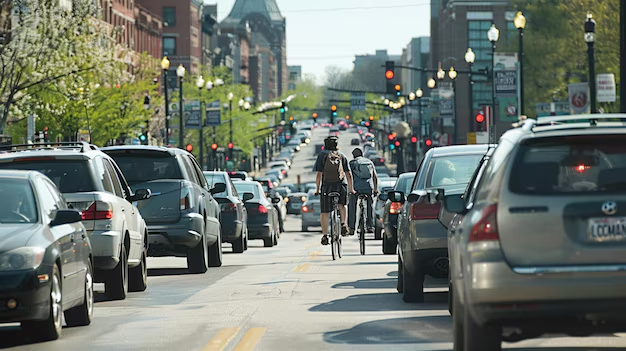

In [5]:
image

In [6]:
from transformers import pipeline
pipe = pipeline("image-text-to-text", model="llava-hf/llava-1.5-7b-hf", device=0)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/674 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Device set to use cuda:0


In [7]:
messages = [
    {"role": "user", "content": [
        {"type": "image", "image": image},
        {"type": "text", "text": "Describe the traffic scene in detail."}
    ]}
]


result = pipe(messages)
print(result[0]["generated_text"][1]["content"])

 The image depicts a busy city street filled with traffic. There are numerous cars and a truck driving down the street, with some cars positioned closer to the foreground and others further back. Two bicyclists are riding their bikes in the middle of the street, sharing the road with the vehicles.

In addition to the vehicles, there are several traffic lights visible along the street, ensuring the safe flow of traffic. A few pedestrians can be seen walking on the sidewalks, and a backpack is noticeable in the scene, possibly belonging to one of the bicyclists or a pedestrian. The overall atmosphere of the image is that of a bustling urban environment with various modes of transportation coexisting.
